In [90]:
from scipy.stats import t, norm, ttest_ind, expon, lognorm, chi2, beta, cauchy
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import permutation_test as p
from sklearn.preprocessing import scale
import pandas as pd
from sklearn.cluster import KMeans

plt.style.use('ggplot')

In [91]:
#!pip install permutation_test

### Задание 1.1

In [102]:
def pval(smean, stdev, mu, n):
    """mu, stdev -  under HO, 
       n - sample size,
       one-tail p-value
    """
    return 1-t.cdf((smean-mu)*np.sqrt(n)/stdev, df = n-1)

In [93]:
p0 = []
for i in range(1000):
    norm_var = norm.rvs(0, scale = 1, size = 4)
    smean = np.mean(norm_var)
    stdev = 1
    pv = pval(smean, stdev, 0, 4)
    p0.append(pv)

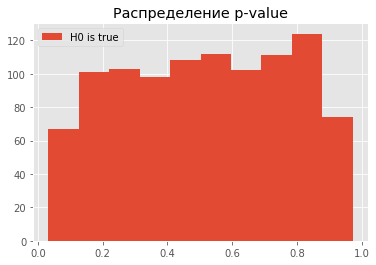

In [94]:
plt.hist(p0, label = 'H0 is true')
plt.legend()
plt.title('Распределение p-value')
plt.show()

In [95]:
p05 = []
for i in range(1000):
    norm_var = norm.rvs(0.5, scale = 1, size = 4)
    smean = np.mean(norm_var)
    stdev = 1
    pv = pval(smean, stdev, 0, 4)
    p05.append(pv)

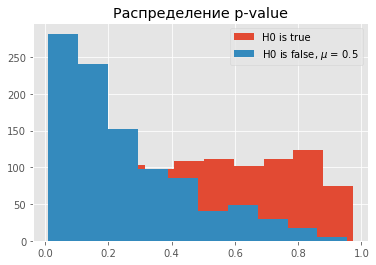

In [99]:
plt.hist(p0, label = 'H0 is true')
plt.hist(p05, label = 'H0 is false, $\mu$ = 0.5')
plt.legend()
plt.title('Распределение p-value')
plt.show()

In [97]:
p1 = []
for i in range(1000):
    norm_var = norm.rvs(1, scale = 1, size = 4)
    smean = np.mean(norm_var)
    stdev = 1
    pv = pval(smean, stdev, 0, 4)
    p1.append(pv)

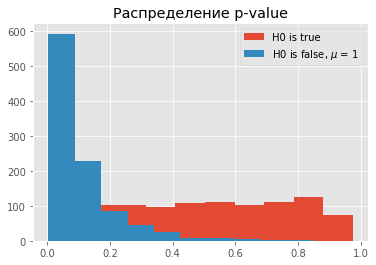

In [101]:
plt.hist(p0, label = 'H0 is true')
plt.hist(p1, label = 'H0 is false, $\mu$ = 1')
plt.legend()
plt.title('Распределение p-value')
plt.show()

### Задание 1.2


$H_0$: $\lambda$ = 1 - верная гипотеза. $H_a$: $\lambda$ > 1 - неверная гипотеза.


В cлучаей экспоненциального распределения t-test асимптотический, то есть дает хороший результат с ростом n. Что видно на графиках.

***NB***: мне немного надоело уточнять формулировки заданий, поэтому сделала так, как поняла. Я генерирую экспоненциально распределенные величины 
с параметром $\lambda$ = 1, затем тестирую несколько односторонних гипотез. 

$H_0$: $\lambda$ = 1 - заведомо верная гипотеза vs $H_a$: $\lambda$ > 1 

$H_0$: $\lambda$ = 0.5 - заведомо неверная гипотеза vs $H_a$: $\lambda$ > 0.5.

Для каждого из двух случаев рассматриваю три варианты размера выборк, как написано в задании.

In [112]:
pexp1 = []
pexp1f = []
for i in range(1000):
    exp_var = expon.rvs(scale = 1, size = 4)
    smean = np.mean(exp_var)
    stdev = 1
    pv = pval(smean, stdev, 1, 4)
    pvf = pval(smean, stdev, 0.5, 4)
    pexp1.append(pv)
    pexp1f.append(pvf)

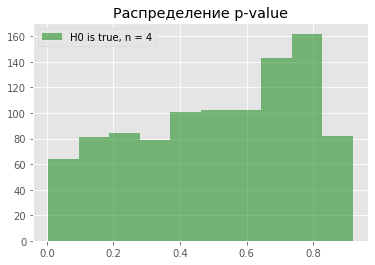

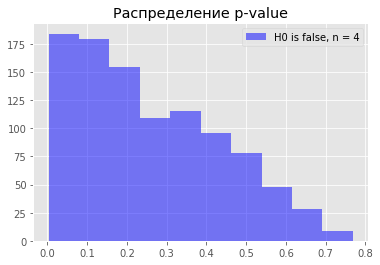

In [115]:
plt.hist(pexp1, label = 'H0 is true, n = 4', color = 'g', alpha = 0.5)
plt.legend()
plt.title('Распределение p-value')
plt.show()

plt.hist(pexp1f, label = 'H0 is false, n = 4', color = 'b', alpha = 0.5)
plt.legend()
plt.title('Распределение p-value')
plt.show()

In [116]:
pexp2 = []
pexp2f = []
for i in range(1000):
    exp_var = expon.rvs(scale = 1, size = 10)
    smean = np.mean(exp_var)
    stdev = 1
    pv = pval(smean, stdev, 1, 10)
    pvf = pval(smean, stdev, 0.5, 10)
    pexp2.append(pv)
    pexp2f.append(pvf)
    

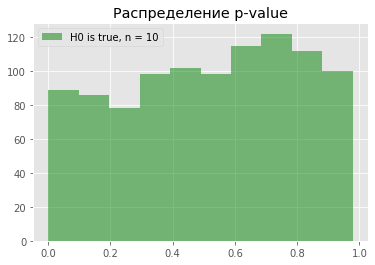

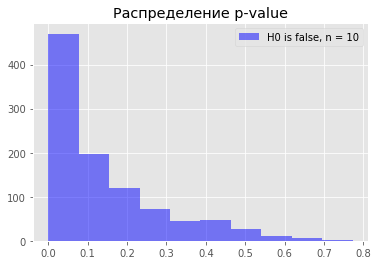

In [117]:
plt.hist(pexp2, label = 'H0 is true, n = 10', color = 'g', alpha = 0.5)
plt.legend()
plt.title('Распределение p-value')
plt.show()

plt.hist(pexp2f, label = 'H0 is false, n = 10', color = 'b', alpha = 0.5)
plt.legend()
plt.title('Распределение p-value')
plt.show()

In [118]:
pexp3 = []
pexp3f = []
for i in range(1000):
    exp_var = expon.rvs( scale = 1, size = 100)
    smean = np.mean(exp_var)
    stdev = 1
    pv = pval(smean, stdev, 1, 100)
    pvf = pval(smean, stdev, 0.5, 100)
    pexp3.append(pv)
    pexp3f.append(pvf)

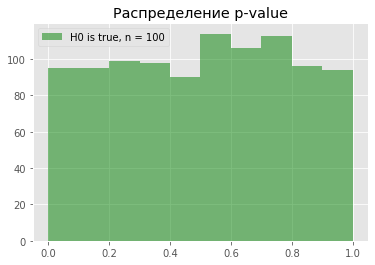

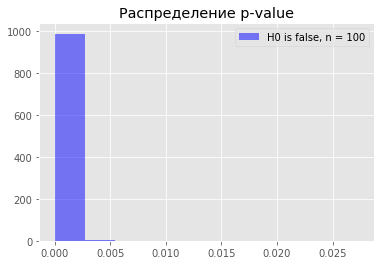

In [119]:
plt.hist(pexp3, label = 'H0 is true, n = 100', color = 'g', alpha = 0.5)
plt.legend()
plt.title('Распределение p-value')
plt.show()

plt.hist(pexp3f, label = 'H0 is false, n = 100', color = 'b', alpha = 0.5)
plt.legend()
plt.title('Распределение p-value')
plt.show()

В указанной статье (See Storey, Tibishirani (2003)) в качестве альтрнативы использованию p-value при множественном тестировании предлагается использовать q-value - то есть, отношение неверно отвергнутых H0  ко всем овтергунытм H0. Эта оценка часто используется в качестве более консервативной альтренативы p-value в биологических исследованиях, чтобы контролировать (не допустить слишком большого числа отвержений) число отвергунтых H0 о незначимости.


**Если честно, я вообще не поняла, каким образом предыдущие два пункта относятся к задаче множественного тестирования. У нас две разных выборки из двух различных распределений и, судя по формулировке, тестируются гипотезы, никак не связанные между собой.**

Подход p-value, в задачах выше, кажется, неплохо справляется с тестированием гипотезы об истинном параметре распределения, поэтому я не виже необходимости  применять метод c использованием q-value. Возможно, я действительно неправильно поняла задачу :) Буду рада комментариям -- хочется все-таки разобраться :) 

### Задание 2

In [229]:
def wald_stat(X1, X2, var1, var2):
    """предположим независимость двух выборок
        и случай известных дисперсий
    """
    s = (np.mean(X1) - np.mean(X2))/np.sqrt(var1/len(X1) + var2/len(X2))
    return {'statistic': s, 'p-value': 2*(1-norm.cdf(abs(s)))}

In [191]:
N_r = 10^3
N_s = [2,3,4,5,10,20,30,40,50,100]
alpha = 0.05 # для двусторонних гипотез разделить на два

#### 1 случай: выборки из одного распределения с равной дисперсией

##### Нормальное распределение

In [208]:
np.random.seed(3)
count_error = []
countw_error = []
countm_error = []
counts_error = []
for i in N_s:
    i_error = [] # сохраняем число единичек 
    iw_error = []
    im_error = []
    is_error = []
    for t in range(0, N_r):
        for delta in np.arange(0, 3.1, 0.1):
            X1 = norm.rvs(0, scale = 1, size = i)
            X2 = norm.rvs(delta, scale = 1, size = i)
            X2 = X2 - np.mean(X2) # не отвергуть гипотезу о равенстве 0 = не отвергунть гипотезу о 
            tt = ttest_ind(X1, X2, equal_var = True)
            wt = wald_stat(X1, X2, 1, 1)
            mt = scipy.stats.mannwhitneyu(X1, X2) #H0 - distributions are equal
            signt = scipy.stats.wilcoxon(X1, X2)
            if tt[1] <= 0.025: ### для t-test
                i_error.append(1)
            else:
                i_error.append(0)
            if wt['p-value'] <= 0.025: ### для z-test
                iw_error.append(1)
            else:
                iw_error.append(0)
            if mt[1] <= 0.025: ### для mannwhitneyu
                im_error.append(1)
            else:
                im_error.append(0)
            if signt[1] <= 0.025: ### для signtest
                is_error.append(1)
            else:
                is_error.append(0)
                
    count_error.append(np.sum(i_error)/len(i_error))
    countw_error.append(np.sum(iw_error)/len(iw_error))
    countm_error.append(np.sum(im_error)/len(im_error))
    counts_error.append(np.sum(is_error)/len(is_error))
    

    

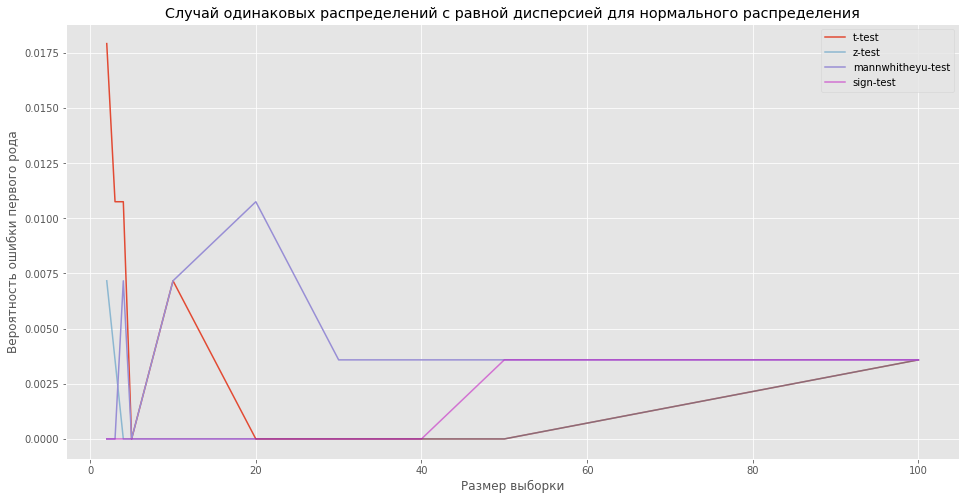

In [209]:
plt.figure(figsize=(16,8))
plt.plot(N_s, count_error, label = 't-test')
plt.plot(N_s, countw_error, alpha = 0.5, label = 'z-test') # не сложно заметить, что при большом n t-распределение стремится к нормальному и результаты похожи
plt.plot(N_s, countm_error, label = 'mannwhitheyu-test')
plt.plot(N_s, counts_error, alpha = 0.5, label = 'sign-test', c = 'm') 
plt.legend()
plt.xlabel('Размер выборки')
plt.ylabel('Вероятность ошибки первого рода')
plt.title('Случай одинаковых распределений с равной дисперсией для нормального распределения')
plt.show()

#### Логнормальное распределение

In [213]:
np.random.seed(3)
count_error = []
countw_error = []
countm_error = []
counts_error = []
for i in N_s:
    i_error = [] # сохраняем число единичек 
    iw_error = []
    im_error = []
    is_error = []
    for t in range(0, N_r):
        for delta in np.arange(0, 3.1, 0.1):
            X1 = np.log(lognorm.rvs(s = 1, scale = 1, size = i))
            X1 = X1 / np.sqrt(np.var(X1, ddof = 1))
            X2 = np.log(lognorm.rvs(s = 1, scale = 1, loc = delta, size = i)) # loc - сдвиг на 0.3
            X2 = (X2 - np.mean(X2))/np.sqrt(np.var(X2, ddof = 1))
            tt = ttest_ind(X1, X2, equal_var = True)
            wt = wald_stat(X1, X2, 1, 1)
            mt = scipy.stats.mannwhitneyu(X1, X2) #H0 - distributions are equal
            signt = scipy.stats.wilcoxon(X1, X2)
            if tt[1] <= 0.05: ### для t-test
                i_error.append(1)
            else:
                i_error.append(0)
            if wt['p-value'] <= 0.05: ### для z-test
                iw_error.append(1)
            else:
                iw_error.append(0)
            if mt[1] <= 0.05: ### для mannwhitneyu
                im_error.append(1)
            else:
                im_error.append(0)
            if signt[1] <= 0.05: ### для signtest
                is_error.append(1)
            else:
                is_error.append(0)
                
    count_error.append(np.sum(i_error)/len(i_error))
    countw_error.append(np.sum(iw_error)/len(iw_error))
    countm_error.append(np.sum(im_error)/len(im_error))
    counts_error.append(np.sum(is_error)/len(is_error))
    

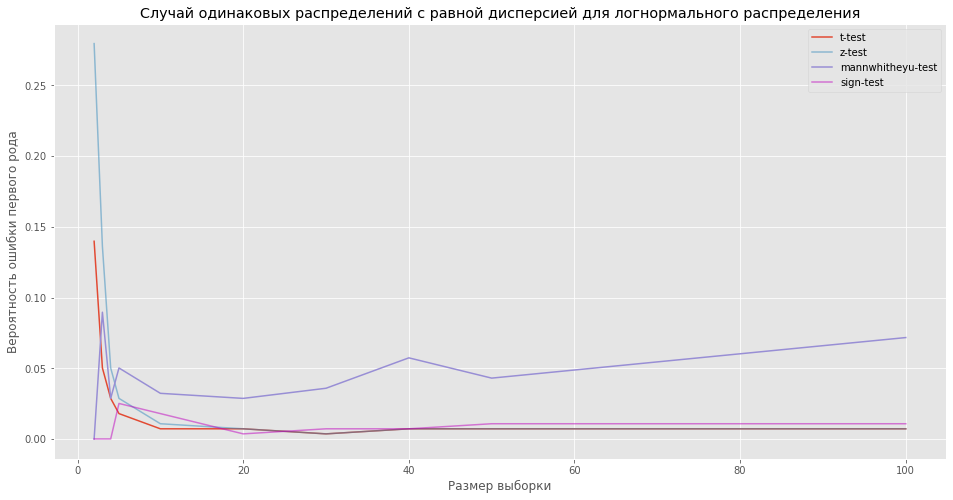

In [196]:
plt.figure(figsize=(16,8))
plt.plot(N_s, count_error, label = 't-test')
plt.plot(N_s, countw_error, alpha = 0.5, label = 'z-test') # не сложно заметить, что при большом n t-распределение стремится к нормальному и результаты похожи
plt.plot(N_s, countm_error, label = 'mannwhitheyu-test')
plt.plot(N_s, counts_error, alpha = 0.5, label = 'sign-test', c = 'm') 
plt.legend()
plt.xlabel('Размер выборки')
plt.ylabel('Вероятность ошибки первого рода')
plt.title('Случай одинаковых распределений с равной дисперсией для логнормального распределения')
plt.show()

####  Распределение Коши

In [197]:
np.random.seed(3)
count_error = []
countw_error = []
countm_error = []
counts_error = []
for i in N_s:
    i_error = [] # сохраняем число единичек 
    iw_error = []
    im_error = []
    is_error = []
    for t in range(0, N_r):
        for delta in np.arange(0, 3.1, 0.1):
            X1 = cauchy.rvs(size = i)
            X2 = cauchy.rvs(loc = delta, size = i)
            X2 = (X2 - np.mean(X2))/np.sqrt(np.var(X2, ddof = 1))
            tt = ttest_ind(X1, X2, equal_var = True)
            wt = wald_stat(X1, X2, 1, 1)
            mt = scipy.stats.mannwhitneyu(X1, X2) #H0 - distributions are equal
            signt = scipy.stats.wilcoxon(X1, X2)
            if tt[1] <= 0.05: ### для t-test
                i_error.append(1)
            else:
                i_error.append(0)
            if wt['p-value'] <= 0.05: ### для z-test
                iw_error.append(1)
            else:
                iw_error.append(0)
            if mt[1] <= 0.05: ### для mannwhitneyu
                im_error.append(1)
            else:
                im_error.append(0)
            if signt[1] <= 0.05: ### для signtest
                is_error.append(1)
            else:
                is_error.append(0)
                
    count_error.append(np.sum(i_error)/len(i_error))
    countw_error.append(np.sum(iw_error)/len(iw_error))
    countm_error.append(np.sum(im_error)/len(im_error))
    counts_error.append(np.sum(is_error)/len(is_error))
    

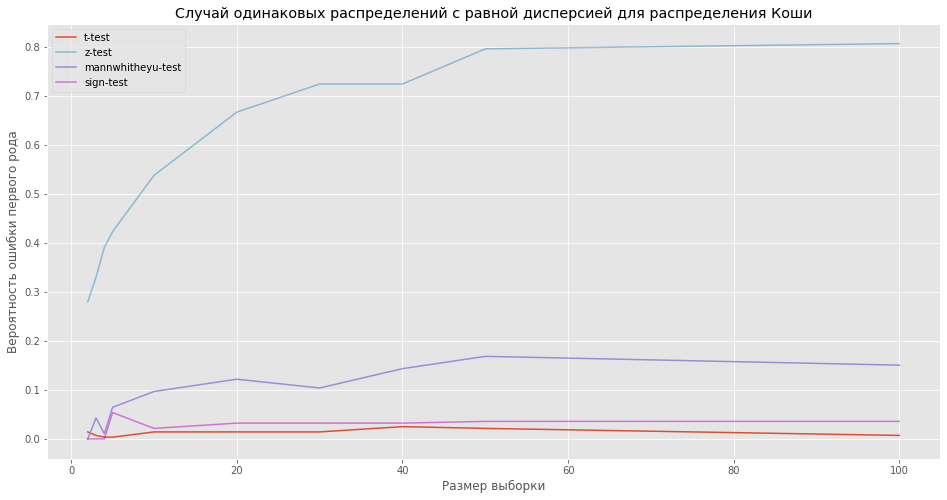

In [198]:
plt.figure(figsize=(16,8))
plt.plot(N_s, count_error, label = 't-test')
plt.plot(N_s, countw_error, alpha = 0.5, label = 'z-test') 
plt.plot(N_s, countm_error, label = 'mannwhitheyu-test')
plt.plot(N_s, counts_error, alpha = 0.5, label = 'sign-test', c = 'm') 
plt.legend()
plt.xlabel('Размер выборки')
plt.ylabel('Вероятность ошибки первого рода')
plt.title('Случай одинаковых распределений с равной дисперсией для распределения Коши')
plt.show()

Кажется, причина такой печали с z-test (особенно) и с Манном-Уитни кроется в том, что для распределения Коши не выполнен закон больших чисел из-за неопределенных моментов. То есть, сходимость к нормальному, которая нужна для обоих тестов, не выполянется. + Неприятность с р. Коши в том, что с размером выборки у него может расти недекватно оценки среднего.Последствия чего мы здесь и наблюдаем.

#### 2 случай: выборки из одного распределения с разной дисперсией

In [206]:
np.random.seed(3)
count_error = []
countw_error = []
countm_error = []
counts_error = []
for i in N_s:
    i_error = [] # сохраняем число единичек 
    iw_error = []
    im_error = []
    is_error = []
    for t in range(0, N_r):
        for delta in np.arange(0, 3.1, 0.1):
            X1 = norm.rvs(0,scale = 2, size = i)
            X2 = norm.rvs(delta, scale =  1, size = i)
            X2 = X2 - np.mean(X2) # не отвергуть гипотезу о равенстве 0 = не отвергунть гипотезу о 
            tt = ttest_ind(X1, X2, equal_var = True)
            wt = wald_stat(X1, X2, 2, 1)
            mt = scipy.stats.mannwhitneyu(X1, X2) #H0 - distributions are equal
            signt = scipy.stats.wilcoxon(X1, X2)
            if tt[1] <= 0.025: ### для t-test
                i_error.append(1)
            else:
                i_error.append(0)
            if wt['p-value'] <= 0.025: ### для z-test
                iw_error.append(1)
            else:
                iw_error.append(0)
            if mt[1] <= 0.025: ### для mannwhitneyu
                im_error.append(1)
            else:
                im_error.append(0)
            if signt[1] <= 0.025: ### для signtest
                is_error.append(1)
            else:
                is_error.append(0)
                
    count_error.append(np.sum(i_error)/len(i_error))
    countw_error.append(np.sum(iw_error)/len(iw_error))
    countm_error.append(np.sum(im_error)/len(im_error))
    counts_error.append(np.sum(is_error)/len(is_error))
    


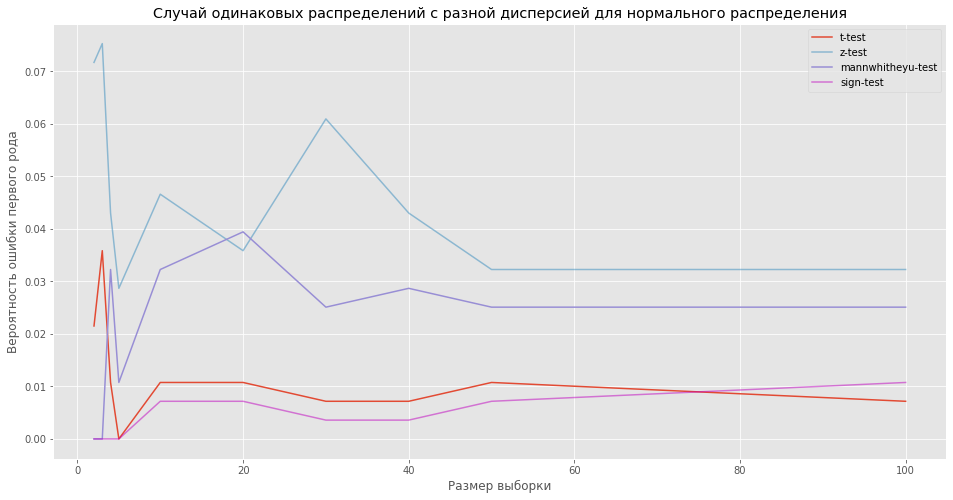

In [207]:
plt.figure(figsize=(16,8))
plt.plot(N_s, count_error, label = 't-test')
plt.plot(N_s, countw_error, alpha = 0.5, label = 'z-test') # не сложно заметить, что при большом n t-распределение стремится к нормальному и результаты похожи
plt.plot(N_s, countm_error, label = 'mannwhitheyu-test')
plt.plot(N_s, counts_error, alpha = 0.5, label = 'sign-test', c = 'm') 
plt.legend()
plt.xlabel('Размер выборки')
plt.ylabel('Вероятность ошибки первого рода')
plt.title('Случай одинаковых распределений с разной дисперсией для нормального распределения')
plt.show()

In [219]:
np.random.seed(3)
count_error = []
countw_error = []
countm_error = []
counts_error = []
for i in N_s:
    i_error = [] # сохраняем число единичек 
    iw_error = []
    im_error = []
    is_error = []
    for t in range(0, N_r):
        for delta in np.arange(0, 3.1, 0.1):
            X1 = np.log(lognorm.rvs(s = 1, scale = 1, size = i))
            X1 = X1 / np.sqrt(np.var(X1, ddof = 1))
            X2 = np.log(lognorm.rvs(s = 1, scale = 2, loc = delta, size = i)) # loc - сдвиг на 0.3
            X2 = (X2 - np.mean(X2))/np.sqrt(np.var(X2, ddof = 1))
            tt = ttest_ind(X1, X2, equal_var = True)
            wt = wald_stat(X1, X2, 1, 2)
            mt = scipy.stats.mannwhitneyu(X1, X2) #H0 - distributions are equal
            signt = scipy.stats.wilcoxon(X1, X2)
            if tt[1] <= 0.05: ### для t-test
                i_error.append(1)
            else:
                i_error.append(0)
            if wt['p-value'] <= 0.05: ### для z-test
                iw_error.append(1)
            else:
                iw_error.append(0)
            if mt[1] <= 0.05: ### для mannwhitneyu
                im_error.append(1)
            else:
                im_error.append(0)
            if signt[1] <= 0.05: ### для signtest
                is_error.append(1)
            else:
                is_error.append(0)
                
    count_error.append(np.sum(i_error)/len(i_error))
    countw_error.append(np.sum(iw_error)/len(iw_error))
    countm_error.append(np.sum(im_error)/len(im_error))
    counts_error.append(np.sum(is_error)/len(is_error))
    

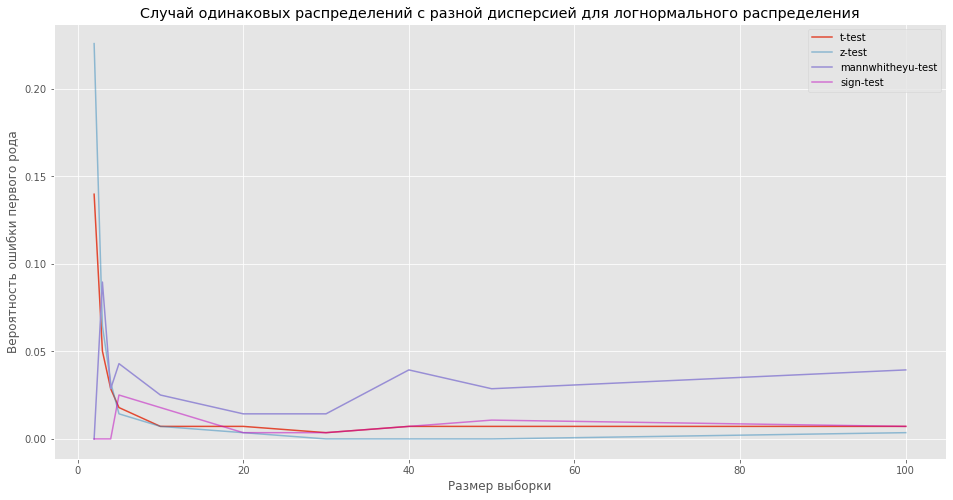

In [220]:
plt.figure(figsize=(16,8))
plt.plot(N_s, count_error, label = 't-test')
plt.plot(N_s, countw_error, alpha = 0.5, label = 'z-test') # не сложно заметить, что при большом n t-распределение стремится к нормальному и результаты похожи
plt.plot(N_s, countm_error, label = 'mannwhitheyu-test')
plt.plot(N_s, counts_error, alpha = 0.5, label = 'sign-test', c = 'm') 
plt.legend()
plt.xlabel('Размер выборки')
plt.ylabel('Вероятность ошибки первого рода')
plt.title('Случай одинаковых распределений с разной дисперсией для логнормального распределения')
plt.show()

#### Распределение Коши

In [226]:
np.random.seed(3)
count_error = []
countw_error = []
countm_error = []
counts_error = []
for i in N_s:
    i_error = [] # сохраняем число единичек 
    iw_error = []
    im_error = []
    is_error = []
    for t in range(0, N_r):
        for delta in np.arange(0, 3.1, 0.1):
            X1 = cauchy.rvs(size = i)
            X2 = cauchy.rvs(loc = delta, scale = 2, size = i)
            X2 = (X2 - np.mean(X2))/np.sqrt(np.var(X2, ddof = 1))
            tt = ttest_ind(X1, X2, equal_var = True)
            wt = wald_stat(X1, X2, 1, 2)
            mt = scipy.stats.mannwhitneyu(X1, X2) #H0 - distributions are equal
            signt = scipy.stats.wilcoxon(X1, X2)
            if tt[1] <= 0.05: ### для t-test
                i_error.append(1)
            else:
                i_error.append(0)
            if wt['p-value'] <= 0.05: ### для z-test
                iw_error.append(1)
            else:
                iw_error.append(0)
            if mt[1] <= 0.05: ### для mannwhitneyu
                im_error.append(1)
            else:
                im_error.append(0)
            if signt[1] <= 0.05: ### для signtest
                is_error.append(1)
            else:
                is_error.append(0)
                
    count_error.append(np.sum(i_error)/len(i_error))
    countw_error.append(np.sum(iw_error)/len(iw_error))
    countm_error.append(np.sum(im_error)/len(im_error))
    counts_error.append(np.sum(is_error)/len(is_error))
    

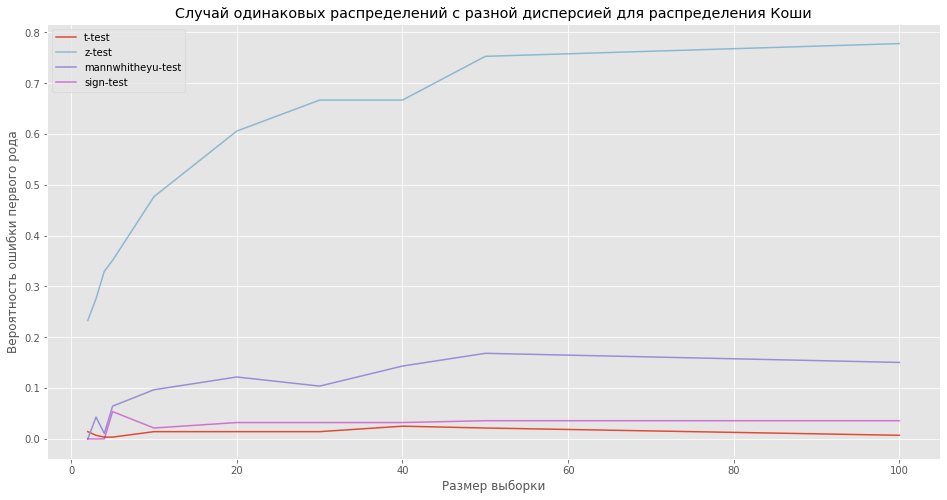

In [227]:
plt.figure(figsize=(16,8))
plt.plot(N_s, count_error, label = 't-test')
plt.plot(N_s, countw_error, alpha = 0.5, label = 'z-test') # не сложно заметить, что при большом n t-распределение стремится к нормальному и результаты похожи
plt.plot(N_s, countm_error, label = 'mannwhitheyu-test')
plt.plot(N_s, counts_error, alpha = 0.5, label = 'sign-test', c = 'm') 
plt.legend()
plt.xlabel('Размер выборки')
plt.ylabel('Вероятность ошибки первого рода')
plt.title('Случай одинаковых распределений с разной дисперсией для распределения Коши')
plt.show()

#### 3 случай: выборки из разных распределений с одинаковыми дисперсиями

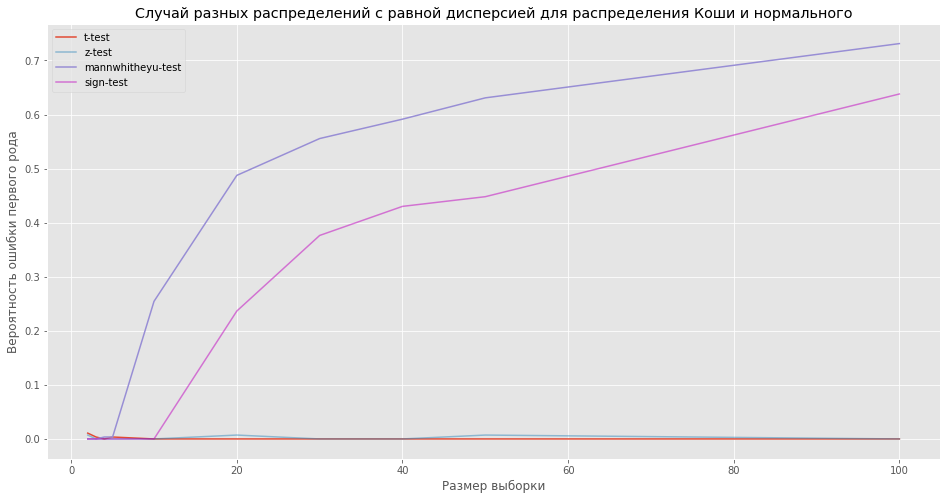

In [235]:
np.random.seed(3)
count_error = []
countw_error = []
countm_error = []
counts_error = []
for i in N_s:
    i_error = [] # сохраняем число единичек 
    iw_error = []
    im_error = []
    is_error = []
    for t in range(0, N_r):
        for delta in np.arange(0, 3.1, 0.1):
            X1 = norm.rvs(0, scale = 1, size = i)
            X2 = cauchy.rvs(delta, scale = 1, size = i)
            X2 = X2 - np.mean(X2) # не отвергуть гипотезу о равенстве 0 = не отвергунть гипотезу о 
            tt = ttest_ind(X1, X2, equal_var = True)
            wt = wald_stat(X1, X2, 1, 1)
            mt = scipy.stats.mannwhitneyu(X1, X2) #H0 - distributions are equal
            signt = scipy.stats.wilcoxon(X1, X2)
            if tt[1] <= 0.025: ### для t-test
                i_error.append(1)
            else:
                i_error.append(0)
            if wt['p-value'] <= 0.025: ### для z-test
                iw_error.append(1)
            else:
                iw_error.append(0)
            if mt[1] <= 0.025: ### для mannwhitneyu
                im_error.append(1)
            else:
                im_error.append(0)
            if signt[1] <= 0.025: ### для signtest
                is_error.append(1)
            else:
                is_error.append(0)
                
    count_error.append(np.sum(i_error)/len(i_error))
    countw_error.append(np.sum(iw_error)/len(iw_error))
    countm_error.append(np.sum(im_error)/len(im_error))
    counts_error.append(np.sum(is_error)/len(is_error))
    

plt.figure(figsize=(16,8))
plt.plot(N_s, count_error, label = 't-test')
plt.plot(N_s, countw_error, alpha = 0.5, label = 'z-test') # не сложно заметить, что при большом n t-распределение стремится к нормальному и результаты похожи
plt.plot(N_s, countm_error, label = 'mannwhitheyu-test')
plt.plot(N_s, counts_error, alpha = 0.5, label = 'sign-test', c = 'm') 
plt.legend()
plt.xlabel('Размер выборки')
plt.ylabel('Вероятность ошибки первого рода')
plt.title('Случай разных распределений с равной дисперсией для распределения Коши и нормального')
plt.show()

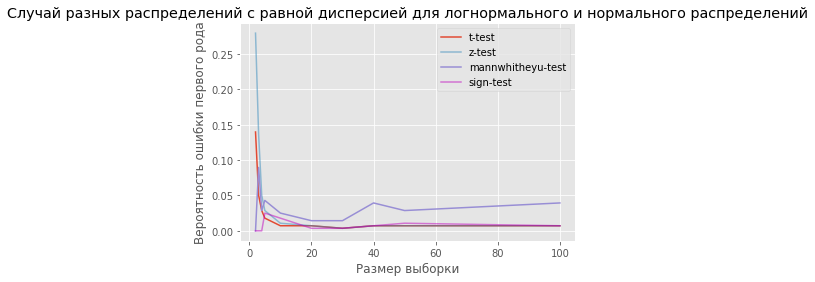

In [234]:
np.random.seed(3)
count_error = []
countw_error = []
countm_error = []
counts_error = []
for i in N_s:
    i_error = [] # сохраняем число единичек 
    iw_error = []
    im_error = []
    is_error = []
    for t in range(0, N_r):
        for delta in np.arange(0, 3.1, 0.1):
            X1 = norm.rvs(scale = 1, size = i)
            X1 = X1 / np.sqrt(np.var(X1, ddof = 1))
            X2 = np.log(lognorm.rvs(s = 1, scale = 2, loc = delta, size = i)) # loc - сдвиг на 0.3
            X2 = (X2 - np.mean(X2))/np.sqrt(np.var(X2, ddof = 1))
            tt = ttest_ind(X1, X2, equal_var = True)
            wt = wald_stat(X1, X2, 1, 1)
            mt = scipy.stats.mannwhitneyu(X1, X2) #H0 - distributions are equal
            signt = scipy.stats.wilcoxon(X1, X2)
            if tt[1] <= 0.05: ### для t-test
                i_error.append(1)
            else:
                i_error.append(0)
            if wt['p-value'] <= 0.05: ### для z-test
                iw_error.append(1)
            else:
                iw_error.append(0)
            if mt[1] <= 0.05: ### для mannwhitneyu
                im_error.append(1)
            else:
                im_error.append(0)
            if signt[1] <= 0.05: ### для signtest
                is_error.append(1)
            else:
                is_error.append(0)
                
    count_error.append(np.sum(i_error)/len(i_error))
    countw_error.append(np.sum(iw_error)/len(iw_error))
    countm_error.append(np.sum(im_error)/len(im_error))
    counts_error.append(np.sum(is_error)/len(is_error))
    
plt.plot(N_s, count_error, label = 't-test')
plt.plot(N_s, countw_error, alpha = 0.5, label = 'z-test') # не сложно заметить, что при большом n t-распределение стремится к нормальному и результаты похожи
plt.plot(N_s, countm_error, label = 'mannwhitheyu-test')
plt.plot(N_s, counts_error, alpha = 0.5, label = 'sign-test', c = 'm') 
plt.legend()
plt.xlabel('Размер выборки')
plt.ylabel('Вероятность ошибки первого рода')
plt.title('Случай разных распределений с равной дисперсией для логнормального и нормального распределений')
plt.show()
    

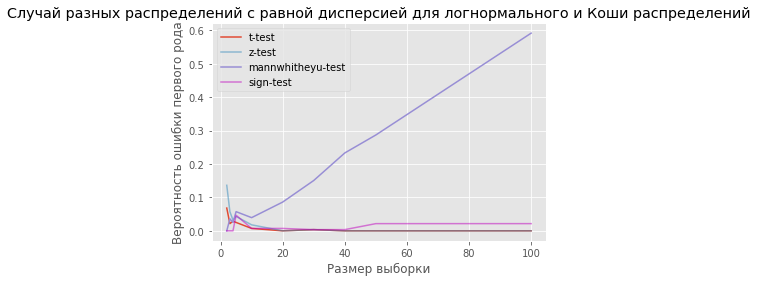

In [242]:
np.random.seed(3)
count_error = []
countw_error = []
countm_error = []
counts_error = []
for i in N_s:
    i_error = [] # сохраняем число единичек 
    iw_error = []
    im_error = []
    is_error = []
    for t in range(0, N_r):
        for delta in np.arange(0, 3.1, 0.1):
            X1 = cauchy.rvs(scale = 1, size = i)
            X1 = X1 / np.sqrt(np.var(X1, ddof = 1))
            X2 = np.log(lognorm.rvs(s = 1, scale = 1, loc = delta, size = i)) # loc - сдвиг на 0.3
            X2 = (X2 - np.mean(X2))/np.sqrt(np.var(X2, ddof = 1))
            tt = ttest_ind(X1, X2, equal_var = True)
            wt = wald_stat(X1, X2, 1, 1)
            mt = scipy.stats.mannwhitneyu(X1, X2) #H0 - distributions are equal
            signt = scipy.stats.wilcoxon(X1, X2)
            if tt[1] <= 0.05: ### для t-test
                i_error.append(1)
            else:
                i_error.append(0)
            if wt['p-value'] <= 0.05: ### для z-test
                iw_error.append(1)
            else:
                iw_error.append(0)
            if mt[1] <= 0.05: ### для mannwhitneyu
                im_error.append(1)
            else:
                im_error.append(0)
            if signt[1] <= 0.05: ### для signtest
                is_error.append(1)
            else:
                is_error.append(0)
                
    count_error.append(np.sum(i_error)/len(i_error))
    countw_error.append(np.sum(iw_error)/len(iw_error))
    countm_error.append(np.sum(im_error)/len(im_error))
    counts_error.append(np.sum(is_error)/len(is_error))
    
plt.plot(N_s, count_error, label = 't-test')
plt.plot(N_s, countw_error, alpha = 0.5, label = 'z-test') # не сложно заметить, что при большом n t-распределение стремится к нормальному и результаты похожи
plt.plot(N_s, countm_error, label = 'mannwhitheyu-test')
plt.plot(N_s, counts_error, alpha = 0.5, label = 'sign-test', c = 'm') 
plt.legend()
plt.xlabel('Размер выборки')
plt.ylabel('Вероятность ошибки первого рода')
plt.title('Случай разных распределений с равной дисперсией для логнормального и Коши распределений')
plt.show()

#### 4 случай: выборки из разных распределений с разными дисперсиями

##### как же я замахалась

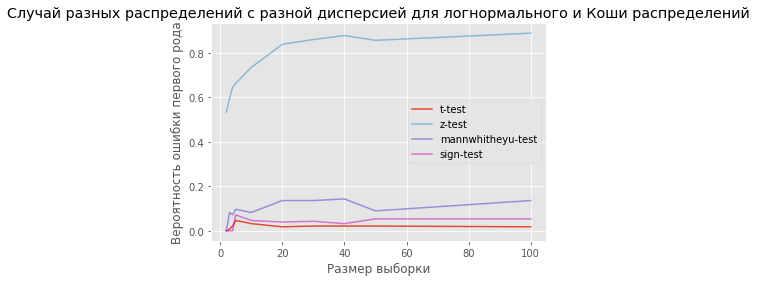

In [243]:
np.random.seed(3)
count_error = []
countw_error = []
countm_error = []
counts_error = []
for i in N_s:
    i_error = [] # сохраняем число единичек 
    iw_error = []
    im_error = []
    is_error = []
    for t in range(0, N_r):
        for delta in np.arange(0, 3.1, 0.1):
            X1 = cauchy.rvs(scale = 2, size = i)
            #X1 = X1 / np.sqrt(np.var(X1, ddof = 1))
            X2 = np.log(lognorm.rvs(s = 1, scale = 1, loc = delta, size = i)) # loc - сдвиг на 0.3
            X2 = (X2 - np.mean(X2))/np.sqrt(np.var(X2, ddof = 1))
            tt = ttest_ind(X1, X2, equal_var = False)
            wt = wald_stat(X1, X2, np.var(X2), 1)
            mt = scipy.stats.mannwhitneyu(X1, X2) #H0 - distributions are equal
            signt = scipy.stats.wilcoxon(X1, X2)
            if tt[1] <= 0.05: ### для t-test
                i_error.append(1)
            else:
                i_error.append(0)
            if wt['p-value'] <= 0.05: ### для z-test
                iw_error.append(1)
            else:
                iw_error.append(0)
            if mt[1] <= 0.05: ### для mannwhitneyu
                im_error.append(1)
            else:
                im_error.append(0)
            if signt[1] <= 0.05: ### для signtest
                is_error.append(1)
            else:
                is_error.append(0)
                
    count_error.append(np.sum(i_error)/len(i_error))
    countw_error.append(np.sum(iw_error)/len(iw_error))
    countm_error.append(np.sum(im_error)/len(im_error))
    counts_error.append(np.sum(is_error)/len(is_error))
    
plt.plot(N_s, count_error, label = 't-test')
plt.plot(N_s, countw_error, alpha = 0.5, label = 'z-test') # не сложно заметить, что при большом n t-распределение стремится к нормальному и результаты похожи
plt.plot(N_s, countm_error, label = 'mannwhitheyu-test')
plt.plot(N_s, counts_error, alpha = 0.5, label = 'sign-test', c = 'm') 
plt.legend()
plt.xlabel('Размер выборки')
plt.ylabel('Вероятность ошибки первого рода')
plt.title('Случай разных распределений с разной дисперсией для логнормального и Коши распределений')
plt.show()

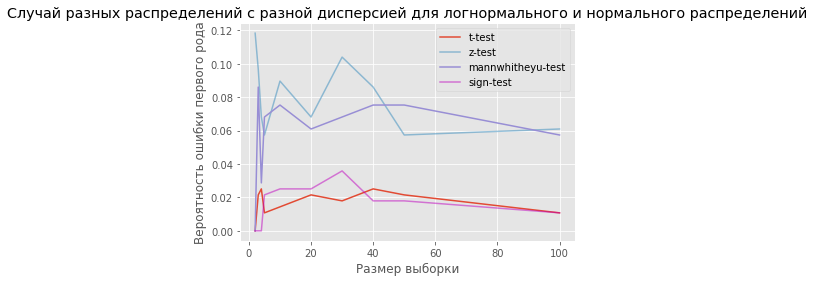

In [244]:
np.random.seed(3)
count_error = []
countw_error = []
countm_error = []
counts_error = []
for i in N_s:
    i_error = [] # сохраняем число единичек 
    iw_error = []
    im_error = []
    is_error = []
    for t in range(0, N_r):
        for delta in np.arange(0, 3.1, 0.1):
            X1 = norm.rvs(scale = 2, size = i)
            #X1 = X1 / np.sqrt(np.var(X1, ddof = 1))
            X2 = np.log(lognorm.rvs(s = 1, scale = 1, loc = delta, size = i)) # loc - сдвиг на 0.3
            X2 = (X2 - np.mean(X2))/np.sqrt(np.var(X2, ddof = 1))
            tt = ttest_ind(X1, X2, equal_var = False)
            wt = wald_stat(X1, X2, 2, 1)
            mt = scipy.stats.mannwhitneyu(X1, X2) #H0 - distributions are equal
            signt = scipy.stats.wilcoxon(X1, X2)
            if tt[1] <= 0.05: ### для t-test
                i_error.append(1)
            else:
                i_error.append(0)
            if wt['p-value'] <= 0.05: ### для z-test
                iw_error.append(1)
            else:
                iw_error.append(0)
            if mt[1] <= 0.05: ### для mannwhitneyu
                im_error.append(1)
            else:
                im_error.append(0)
            if signt[1] <= 0.05: ### для signtest
                is_error.append(1)
            else:
                is_error.append(0)
                
    count_error.append(np.sum(i_error)/len(i_error))
    countw_error.append(np.sum(iw_error)/len(iw_error))
    countm_error.append(np.sum(im_error)/len(im_error))
    counts_error.append(np.sum(is_error)/len(is_error))
    
plt.plot(N_s, count_error, label = 't-test')
plt.plot(N_s, countw_error, alpha = 0.5, label = 'z-test') # не сложно заметить, что при большом n t-распределение стремится к нормальному и результаты похожи
plt.plot(N_s, countm_error, label = 'mannwhitheyu-test')
plt.plot(N_s, counts_error, alpha = 0.5, label = 'sign-test', c = 'm') 
plt.legend()
plt.xlabel('Размер выборки')
plt.ylabel('Вероятность ошибки первого рода')
plt.title('Случай разных распределений с разной дисперсией для логнормального и нормального распределений')
plt.show()
    

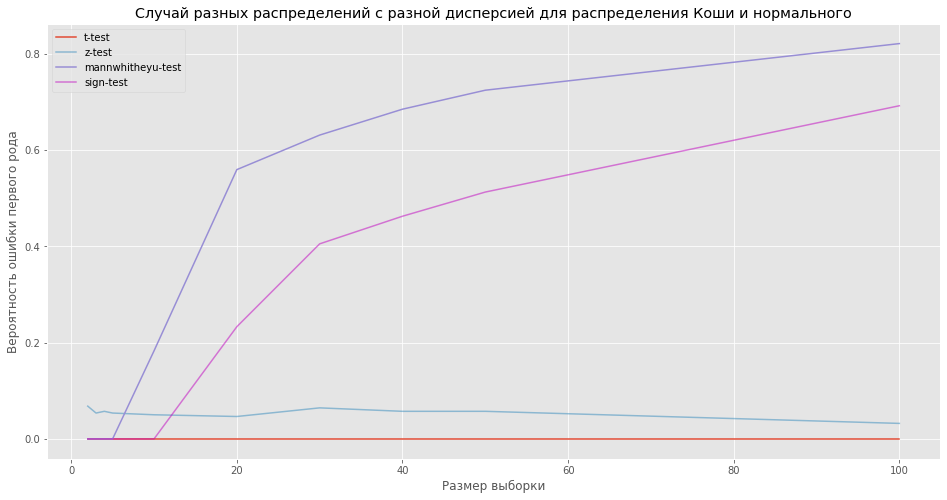

In [247]:
np.random.seed(3)
count_error = []
countw_error = []
countm_error = []
counts_error = []
for i in N_s:
    i_error = [] # сохраняем число единичек 
    iw_error = []
    im_error = []
    is_error = []
    for t in range(0, N_r):
        for delta in np.arange(0, 3.1, 0.1):
            X1 = norm.rvs(0, scale = 2, size = i)
            X2 = cauchy.rvs(delta, scale = 1, size = i)
            X2 = (i-1)*(X2 - np.mean(X2))/np.sqrt(np.var(X2)) # не отвергуть гипотезу о равенстве 0 = не отвергунть гипотезу о 
            tt = ttest_ind(X1, X2, equal_var = False)
            wt = wald_stat(X1, X2, 2, 1)
            mt = scipy.stats.mannwhitneyu(X1, X2) #H0 - distributions are equal
            signt = scipy.stats.wilcoxon(X1, X2)
            if tt[1] <= 0.025: ### для t-test
                i_error.append(1)
            else:
                i_error.append(0)
            if wt['p-value'] <= 0.025: ### для z-test
                iw_error.append(1)
            else:
                iw_error.append(0)
            if mt[1] <= 0.025: ### для mannwhitneyu
                im_error.append(1)
            else:
                im_error.append(0)
            if signt[1] <= 0.025: ### для signtest
                is_error.append(1)
            else:
                is_error.append(0)
                
    count_error.append(np.sum(i_error)/len(i_error))
    countw_error.append(np.sum(iw_error)/len(iw_error))
    countm_error.append(np.sum(im_error)/len(im_error))
    counts_error.append(np.sum(is_error)/len(is_error))
    

plt.figure(figsize=(16,8))
plt.plot(N_s, count_error, label = 't-test')
plt.plot(N_s, countw_error, alpha = 0.5, label = 'z-test') # не сложно заметить, что при большом n t-распределение стремится к нормальному и результаты похожи
plt.plot(N_s, countm_error, label = 'mannwhitheyu-test')
plt.plot(N_s, counts_error, alpha = 0.5, label = 'sign-test', c = 'm') 
plt.legend()
plt.xlabel('Размер выборки')
plt.ylabel('Вероятность ошибки первого рода')
plt.title('Случай разных распределений с разной дисперсией для распределения Коши и нормального')
plt.show()

### Задание 3

Судя по картинке, на Центральный Лондон выпало 67 бомб

In [248]:
data_all = pd.read_csv('v2_bombing_london.csv', index_col=0)

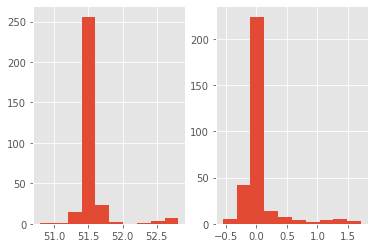

In [249]:
fig, axis = plt.subplots(1,2)
axis[0].hist(data_all['y'])
axis[1].hist(data_all['x'])
plt.show()

In [250]:
print(np.percentile(data_all['y'], q = 95))
print(np.percentile(data_all['y'], q = 5))

51.7489708
51.39896015


Разобьем на глаз по частоте падающих бомб и прикинем, чтобы их было примерно 63, как на картинке :)

In [251]:
y = data_all['y']
a = np.percentile(data_all['y'], q = 60)
b =  np.percentile(data_all['y'], q = 40)
data_high = data_all[y<a]
data = data_high[y>b]

print(np.percentile(data['x'], q = 95))
print(np.percentile(data['y'], q = 95))

0.08885184999999997
51.5261271


C:\Users\DNS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [252]:
data.shape

(62, 4)

Наверное, имеет смысл разбить область на небольшие квадраты :)

In [254]:
km = KMeans(n_clusters = 10).fit(data[['x', 'y']])
area = km.labels_ # нашли точки, которые лежат примерно в одном радиусе
data['area'] = area
expected = len(area)/10 # H0 - равномерно в каждой области

C:\Users\DNS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Будем использовать Критерий Пирсона. Его суть - сравнить квадраты отклонений наблюдаемого распределения от тестируемого. В нашем случае тестируемое - равномерное.

In [255]:
import collections
c = collections.Counter(area).values()
print(r'Наблюдемое значение $\chi^2$ =', np.sum((np.array(list(c))-expected)**2)/20) #подсчитали квадраты отклонений и просуммировали доли

Наблюдемое значение $\chi^2$ = 6.779999999999999


In [256]:
chi2.ppf(q = 0.95, df = 9) # критическое значение. Левее него H0 отвергается

16.918977604620448

Видим, что наблюдаемое значение статистики попало в область не отвержения H0 :). Следовательно, гипотеза о равномерности бросании бомб не отвергнута.

Теперь мы предполагаем, что наша выборка из равномерного распределения. Посчитаем империческую ошибку первого рода.

In [260]:
X1 = np.random.uniform(51.492126, 51.528217, size = 62)
X2 = np.random.uniform(-0.408458, 0.104949, size = 62)
test_data = pd.DataFrame({'Y': X1, 'X': X2})

In [261]:
def emp_one_type_error(test_data, alpha):
    type_1 = []
    
    for i in range(0, 100):
        test_data = test_data.sample(frac = 1)        
        km = KMeans(n_clusters = 10).fit(test_data[['Y', 'X']])
        area = km.labels_ # нашли точки, которые лежат примерно в одном радиусе
        test_data['area'] = area
        expected = len(area)/10 # H0 - равномерно в каждой области
        c = collections.Counter(area).values()
        stat = np.sum((np.array(list(c))-expected)**2)/10 
        if chi2.ppf(q = 1-alpha, df = i-1) < stat:
            type_1.append(1)
        else:
            type_1.append(0)

    return np.mean(type_1)

И второго рода, в предположении, что $H_a : (x,y) \sim beta(1+\epsilon; 1 + \epsilon)$

In [263]:
def emp_second_type_error(alpha):
    type_2 = []
    
    for i in np.linspace(-0.99,2):
        B1 =  beta.rvs(1+i, 1+i, size = 62)
        B2 =  beta.rvs(1+i, 1+i, size = 62)
        test_data = pd.DataFrame({'Y': B1, 'X': B2})   
        km = KMeans(n_clusters = 10).fit(test_data[['Y', 'X']])
        area = km.labels_ # нашли точки, которые лежат примерно в одном радиусе
        test_data['area'] = area
        expected = len(area)/10 # H0 - равномерно в каждой области
        c = collections.Counter(area).values()
        stat = np.sum((np.array(list(c))-expected)**2)/10 
        if chi2.ppf(q = 1-alpha, df = i-1) > stat:
            type_2.append(1)
        else:
            type_2.append(0)

    return np.mean(type_2)

In [95]:
emp_one_type_error(test_data, 0.05) # :)

0.01

In [117]:
emp_second_type_error(0.05) # :) # Веротность ошибки 2 рода

0.04

### Выводы

Не надо доверять глазам :) Разбиение на более мелкие области иногда позволяет лучше воостановить распределение данных. Метод k-средних - простой, но надежный метод кластеризации, который позволяет разбивать выборку на классы в зависимоти от расстояния от предполагаемого "центра". В нашем случае он сработал хорошо :)

#### Задача 4 